In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-23 18:03:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-23 18:03:50 (112 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train'.
There are 0 directories and 3680 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Normal'.
There are 0 directories and 3596 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Malignant'.
There are 0 directories and 3527 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train/Benign'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test'.
There are 0 directories and 60 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test/Benign'.
There are 0 directories and 66 images in '/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test/Malignant'.
There are 0 directories and 77 images in '/content/dr

In [4]:
train_dir = "/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Train"
test_dir = "/content/drive/MyDrive/Tez Dosyaları/birinci veriseti 3 classlı/Test"

In [5]:
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode= "categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 10803 files belonging to 3 classes.
Found 203 files belonging to 3 classes.


In [6]:
train_data.class_names

['Benign', 'Malignant', 'Normal']

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [8]:
import tensorflow as tf

# 1. create base model with tf.keras.applications
base_model = tf.keras.applications.ResNet50(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer for 3 classes
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model for 3 classes
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Assuming you have already prepared your train_data and test_data
# Make sure that train_data and test_data are prepared with class_mode='categorical'

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="3_class_feature_extraction")])

94765736/94765736 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Saving TensorBoard log files to: transfer_learning/3_class_feature_extraction/20240723-185942
Epoch 1/40
338/338 [==============================] - 306s 863ms/step - loss: 1.0656 - accuracy: 0.4760 - val_loss: 1.0102 - val_accuracy: 0.5222
Epoch 2/40
338/338 [==============================] - 36s 105ms/step - loss: 0.9389 - accuracy: 0.5482 - val_loss: 0.9523 - val_accuracy: 0.5517
Epoch 3/40
338/338 [==============================] - 35s 102ms/step - loss: 0.8859 - accuracy: 0.5784 - val_loss: 0.9260 - val_accuracy: 0.5369
Epoch 4/40
338/338 [==============================] - 35s 102ms/step - loss: 0.8616 - accuracy: 0.5970 - val_loss: 0.9309 - val_accuracy: 0.5714
Epoch 5/40
338/338 [==============================] - 35s 102ms/step - loss: 0.8554 - accuracy: 0.6003 - val_loss: 0.9675 - val_accuracy: 0.5320


In [9]:
results_feature_extraction = model_0.evaluate(test_data)
results_feature_extraction

7/7 [==============================] - 2s 86ms/step - loss: 1.1063 - accuracy: 0.5271


[1.1063079833984375, 0.5270935893058777]

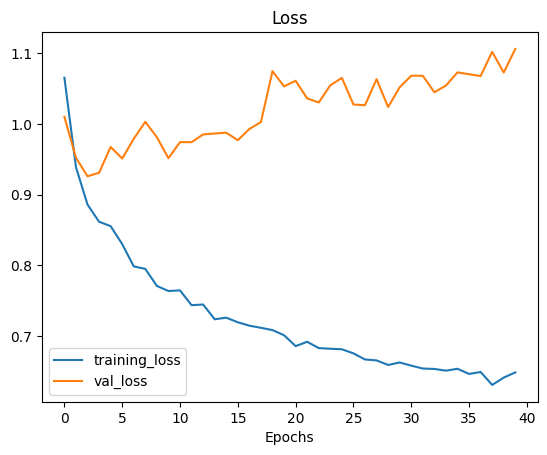

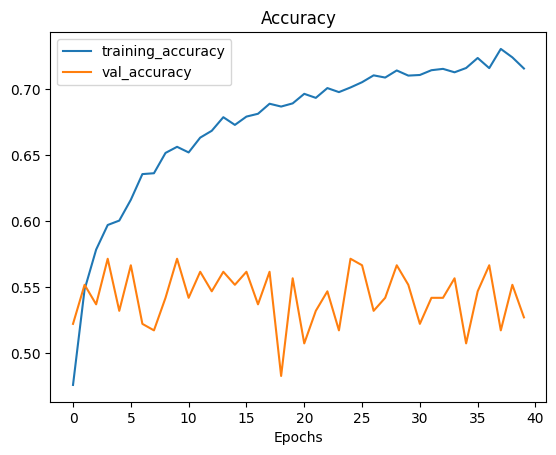

In [10]:
plot_loss_curves(history_0)


In [11]:
from sklearn.metrics import classification_report

# Assuming you have true labels for your test data stored in y_true
# and predictions from your model stored in y_pred

# Convert categorical predictions to class labels
y_pred_labels = np.argmax(model_0.predict(test_data), axis=1)

# Get true labels from the test dataset
y_true_labels = np.concatenate([y for x, y in test_data], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

7/7 [==============================] - 3s 98ms/step
              precision    recall  f1-score   support

           0       0.27      0.30      0.29        60
           1       0.28      0.20      0.23        66
           2       0.40      0.47      0.43        77

    accuracy                           0.33       203
   macro avg       0.32      0.32      0.32       203
weighted avg       0.32      0.33      0.32       203

